# Decision Tree
A decision tree is a machine learning algorithm that uses a tree-like model of decisions and their subsequent consequences to arrive at a particular decision. It is a Supervised Machine Learning model, where the data is continuously split according to a certain parameter, and finally, a decision is made.

A decision tree contains three types of nodes
<ul>
    <li>1.<b>Root node:</b> The very top node that represents the entire population or sample.
    <li>2.<b>Decision nodes:</b> Sub-nodes that split from the root node.
    <li>3.<b>Leaf nodes:</b> Nodes with no children, also known as terminal nodes.
</ul>
<br>

 ![Decision Tree](https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png)  

# Choosing the best attribute at each node
Information gain and Gini impurity, act as popular splitting criterion for decision tree models.
<br>
# Entropy and Information Gain
<br>
Entropy is a concept that stems from information theory, which measures the impurity of the sample values. It is defined with by the following formula, where: 

![Entropy Formula](https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/sys/cf/ul/g/b5/8c/Entropy-Formula.component.complex-narrative-xl.ts=1665761213563.png/content/adobe-cms/us/en/topics/decision-trees/jcr:content/root/table_of_contents/body/complex_narrative_44780520/items/content_group_86925341/image)  

<br>

In order to select the best feature to split on and find the optimal decision tree, the attribute with the smallest amount of entropy should be used. Information gain represents the difference in entropy before and after a split on a given attribute. The attribute with the highest information gain will produce the best split as it’s doing the best job at classifying the training data according to its target classification. Information gain is usually represented with the following formula, where: 

![Information Gain Formula](https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/other/ul/g/b8/80/Information-Gains-Entropy3.svg#svgView(viewBox(0,0,1280,720);preserveAspectRatio(xMidYMid))) 

# Gini Impurity 

Gini impurity is the probability of incorrectly classifying random data point in the dataset if it were labeled based on the class distribution of the dataset. Similar to entropy, if set, S, is pure—i.e. belonging to one class) then, its impurity is zero. This is denoted by the following formula:

![Gini Impurity Formula](https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/54/f8/Gini-Impurity.component.complex-narrative-xl.ts=1665761214383.png/content/adobe-cms/us/en/topics/decision-trees/jcr:content/root/table_of_contents/body/complex_narrative_44780520/items/content_group_1218263245/image)

In [31]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn import tree
from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

In [2]:
# Loading the iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
                                          'petal width (cm)', 'Species'])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
#Inspecting the structure of Dataframe
print(df.shape)
print('\n',df.dtypes)
print()
print(df.info())

(146, 5)

 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Species               object
dtype: object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  146 non-null    float64
 1   sepal width (cm)   146 non-null    float64
 2   petal length (cm)  146 non-null    float64
 3   petal width (cm)   146 non-null    float64
 4   Species            146 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB
None


In [9]:
#Checking for null values in the dataset
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [10]:
# To see summary statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


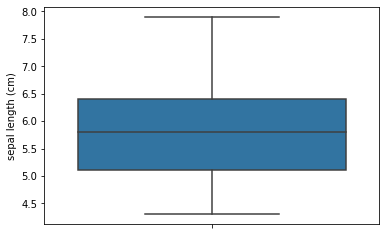

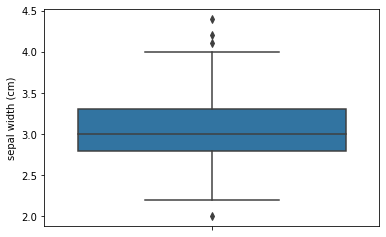

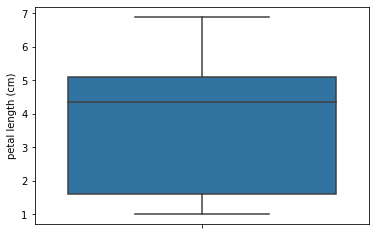

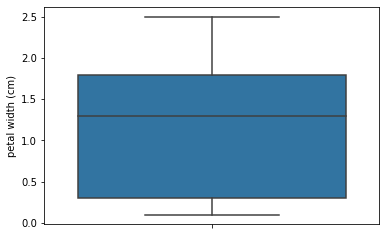

From the above boxplot we can say that there are outliers in the column 'sepal width (cm)'


In [13]:
# To find outliers
cols = df.columns[0:-1]
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()
    
print("From the above boxplot we can say that there are outliers in the column 'sepal width (cm)'")

In [14]:
# To remove outliers from 'sepal width (cm)'
q1 = df['sepal width (cm)'].quantile(0.25)
q3 = df['sepal width (cm)'].quantile(0.75)
iqr = q3 - q1
df = df[(df['sepal width (cm)'] >= q1-1.5*iqr) & (df['sepal width (cm)'] <= q3+1.5*iqr)]

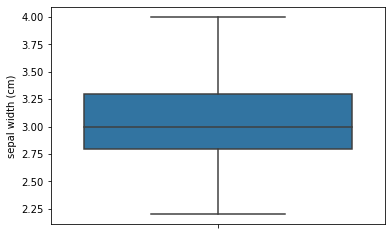

In [16]:
#After Removing Outliers
sns.boxplot(y=df['sepal width (cm)'])
plt.show()

In [17]:
# Splitting the data into train and test sets
X = df.drop("Species",axis=1)
y = df["Species"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state= 42)

In [19]:
# Defining an object for DTC and fitting for whole dataset
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1 )
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

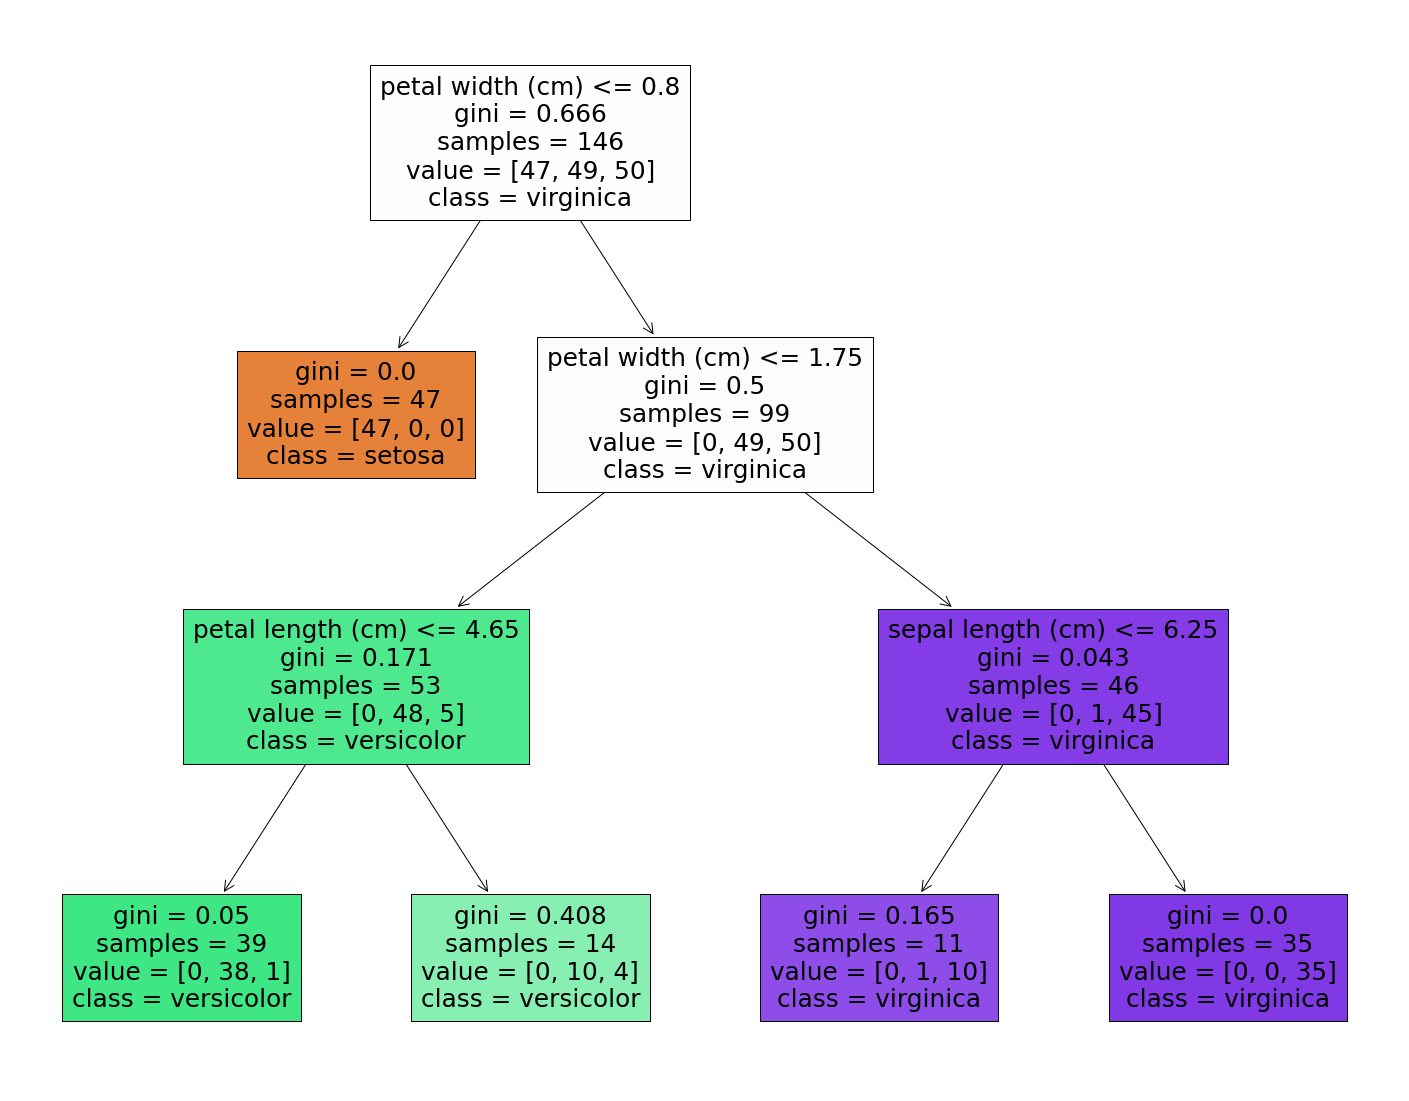

In [26]:
fig = plt.figure(figsize=(25,20))
iris = datasets.load_iris()
_ = tree.plot_tree(dt, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [27]:
# Defining an object for DTC and fitting for train dataset
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred_train = dt.predict(x_train)
y_pred = dt.predict(x_test)
y_prob = dt.predict_proba(x_test)

In [28]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.9591836734693877


In [32]:
#Classification for test before hyperparameter tuning
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.95      0.95      0.95        19

       accuracy                           0.96        49
      macro avg       0.95      0.95      0.95        49
   weighted avg       0.96      0.96      0.96        49



In [34]:
# Hyperparameter Tuning of DTC

dt = DecisionTreeClassifier(random_state=1)

params = {'max_depth' : [2,3,4,5],
        'min_samples_split': [2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5]}

gsearch = GridSearchCV(dt, param_grid=params, cv=3)

gsearch.fit(X,y)

gsearch.best_params_

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [36]:
# Passing best parameter for the Hyperparameter Tuning
dt = DecisionTreeClassifier(**gsearch.best_params_, random_state=1)

dt.fit(x_train, y_train)

y_pred_train = dt.predict(x_train)
y_prob_train = dt.predict_proba(x_train)[:,1]

y_pred = dt.predict(x_test)
y_prob = dt.predict_proba(x_test)[:,1]

In [37]:
print('Confusion Matrix - Train:','\n',confusion_matrix(y_train,y_pred_train))
print('\n','Confusion Matrix - Test:','\n',confusion_matrix(y_test,y_pred))

Confusion Matrix - Train: 
 [[28  0  0]
 [ 0 37  1]
 [ 0  1 30]]

 Confusion Matrix - Test: 
 [[19  0  0]
 [ 0 10  1]
 [ 0  1 18]]


In [38]:
#Classification for test after hyperparameter tuning
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.95      0.95      0.95        19

       accuracy                           0.96        49
      macro avg       0.95      0.95      0.95        49
   weighted avg       0.96      0.96      0.96        49



In [41]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))
print("\nAfter hyperparameter tuning we can say the overfitting has been reduced slightly")

Accuracy of Decision Tree-Train:  0.979381443298969
Accuracy of Decision Tree-Test:  0.9591836734693877

After hyperparameter tuning we can say the overfitting has been reduced slightly
